---
# bara til að stilla preview file type
format:
    pdf:
        latex-max-runs: 3
---

# Dæmi 4
Biti $OAB$ er innspenntur í punkti $O$ og myndaður með því að festa saman tvo rétthyrnda vinkla sem báðir hafa jafnar hliðarlengdir $w=125 \text{ mm}$ og þykkt $t=10.0 \text{ mm}$. Á bitann verkar jafndreift álag $q=1.00 \text{ kN/m}$ yfir $OAB$ og stakur kraftur $P_A=2.50 \text{ kN}$ í punkti A. Gerið ráð fyrir að allar gefnar stærðir á mynd hafi a.m.k þrjá markverða tölustafi eða fleiri sé svo sýnt.

(a) Ákvarðið lóðrétta færslu $y(x)$ í punkti $x=B$ með samlagningaraðferð (e. superposition).
(b) Endurtakið lið (a) en notið Macauley sérstöðuföll.
(c) Berið saman niðurstöður í (a) og (b). 
(d) Teiknið $y(x)$ og $\theta(x)$ þar sem $\theta$ er halli (e. slope) bitans.

![](fig/v1_d4.png){width=80% fig-align="center"}

## Lausn

### (a) Samlagningaraðferð
Notum tilfelli #2 og #3 í Töflu A-9 í Shigley. Skilgreinum $w$ = 1.00 \text{ kN/m}$ og $P_A = 2.50 \text{ kN}$. Lengd bitsins er $l = 3.00 \text{ m}$ og punkturinn $A$ er í fjarlægð $a = 2.00 \text{ m}$ frá upphafspunkti hnitakerfis í vinstri enda bitans.

Tilfelli 2 gefur færslur
$$
    y_{OA}(x)
    =
    \frac{P_A x^2}{6EI}
    (x - 3a)
$$
og
$$
    y_{AB}(x)
    =
    \frac{P_A a^2}{6EI}
    (a - 3x).
$$

Tilfelli 3 gefur færslu
$$
    y(x)
    =
    \frac{w x^2}{24EI}
    (4lx - x^2 - 6l^2).
$$

Þar með er heildarfærslan fyrir hluta $OA$
$$
\begin{aligned}
    y_{total, OA}(x)
    &=
    y_{OA}(x)
    +
    y(x) \\
    &=
    \frac{P_A x^2}{6EI}
    (x - 3a)
    +
    \frac{w x^2}{24EI}
    (4lx - x^2 - 6l^2).
\end{aligned}
$$ 
og fyrir hluta $AB$
$$
\begin{aligned}
    y_{total, AB}(x)
    &=
    y_{AB}(x)
    +
    y(x) \\
    &=
    \frac{P_A a^2}{6EI}
    (a - 3x)
    +
    \frac{w x^2}{24EI}
    (4lx - x^2 - 6l^2).
\end{aligned}
$$

Reiknum færsluna í punkti $x=B=3.00 \text{ m}$. Það er ekki gefið hvað efni um ræðir svo við tökum vinklana sem stálvinkla með $E=210 \text{ GPa}$. Flatartregðuna reiknum við tölulega fyrir neðan.

Flatarmiðja yc = 70.60 mm frá neðri brún
Flatartregða I = 4.200e+06 mm^4
Færsla í punkti B er y(l) = -24.706 mm


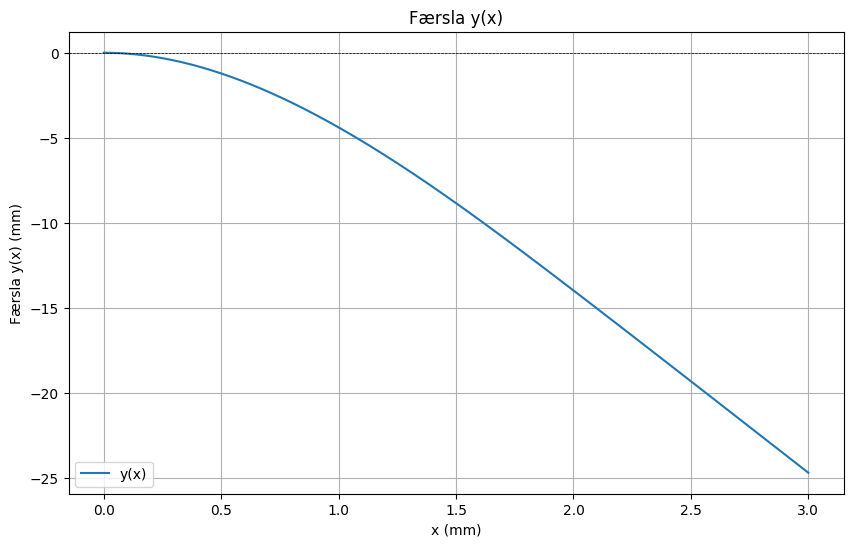

In [2]:
#| echo: true
#| output: true

import numpy as np
P_A = 2500 # N
w = 1000 # N/m
l = 3.0 # m
a = 2.0  # m
E = 210e9 # Pa, sirka gildi fyrir stál

# stærðir vinkla
b = 100e-3 # mm
t = 12e-3 # mm
A = b * t # mm^2

# flatarmiðjan, mælt frá neðri lóðrétts flangsa T þversniðs
Atop = (2 * b) * t
ytop = b - t/2
Avert = (b - t) * (2 * t)
yvert = (b - t) / 2
yc = (Atop * ytop + Avert * yvert) / (Atop + Avert)
print(f"Flatarmiðja yc = {yc*1e3:.2f} mm frá neðri brún")

# flatartregða I um flatarmiðju
Itop = (2 * b) * t**3 / 12 + Atop * (ytop - yc)**2
Ivert = (2 * t) * (b - t)**3 / 12 + Avert * (yvert - yc)**2
I = Itop + Ivert
print(f"Flatartregða I = {I*1e12:.3e} mm^4")

# skilgreinum y(x) - getum notað heaviside fall til að víxla á tilfellum milli OA og AB
def y_fun(x):
    y_OA = (
        (P_A * x**2 / (6 * E * I)) * (x - 3*a)
        + (w * x**2 / (24 * E * I)) * (4*l*x - x**2 - 6*l**2)
    )

    y_AB = (
        (P_A * a**2 / (6 * E * I)) * (a - 3*x)
        + (w * x**2 / (24 * E * I)) * (4*l*x - x**2 - 6*l**2)
    )

    y_out = (
        y_OA * (np.heaviside(x, 1) - np.heaviside(x -a, 1))
        + y_AB * np.heaviside(x - a, 1)
    )
    return y_out

# reiknum y(x) í punkti x=B=l
print(f"Færsla í punkti B er y(l) = {y_fun(l)*1e3:.3f} mm")

# teiknum y(x) yfir allt bilið [0, l]
import matplotlib.pyplot as plt
x_vals = np.linspace(0, l, 1000)
y_vals = np.array([y_fun(x) for x in x_vals])
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals*1e3, label='y(x)')
plt.title('Færsla y(x)')
plt.xlabel('x (mm)')
plt.ylabel('Færsla y(x) (mm)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()  

### (b) Macauley sérstöðuföll
Finnum færslufallið fyrir þetta álagstilfelli með því að setja upp einvíð Macauley föll fyrir álag $q(x)$, innriskerkraft $V(x)$ og innra vægi $M(x)$.

Ytra álagið $q(x)$ er
$$
    q(x)
    =
    M_1 \langle x \rangle^{-2}
    + R_1 \langle x \rangle^{-1}
    - w \langle x \rangle^{0}
    - P_A \langle x - a \rangle^{-1}.
$$

Innri skerfraftur $V(x)$ er (með réttu formerki)
$$
    V(x)
    =
    - M_1 \langle x \rangle^{-1}
    - R_1 \langle x \rangle^{0}
    + w \langle x \rangle^{1}
    + P_A \langle x - a \rangle^{0}.
$$

Innra vægið $M(x)$ er (með réttu formerki)
$$
    M(x)
    =
    - M_1 \langle x \rangle^{0}
    + R_1 \langle x \rangle^{1}
    - \frac{w}{2} \langle x \rangle^{2}
    - P_A \langle x - a \rangle^{1}.
$$

Leysum fyrir undirstöðurkrafta og vægi með því að setja $V(l)=0$ og $M(l)=0$ þar sem $l=3.00 \text{ m}$ er lengd bitsins. Fáum þá
$$
    R_1
    =
    wl
    + P_A
$$
og
$$
    M_1
    =
    R_1 l
    -\frac{w l^2}{2}
    - P_A (l - a)
$$


Undirstöðukraftur í punkti A er R_1 = 5500.0 N
Undirstöðuvægi í punkti A er M_A = 9500.0 Nm
Samtala krafta er sum(F) = 0.0 N (á að vera 0)
Samtala vægis um punkt A er sum(M) = 0.0 Nm (á að vera 0)


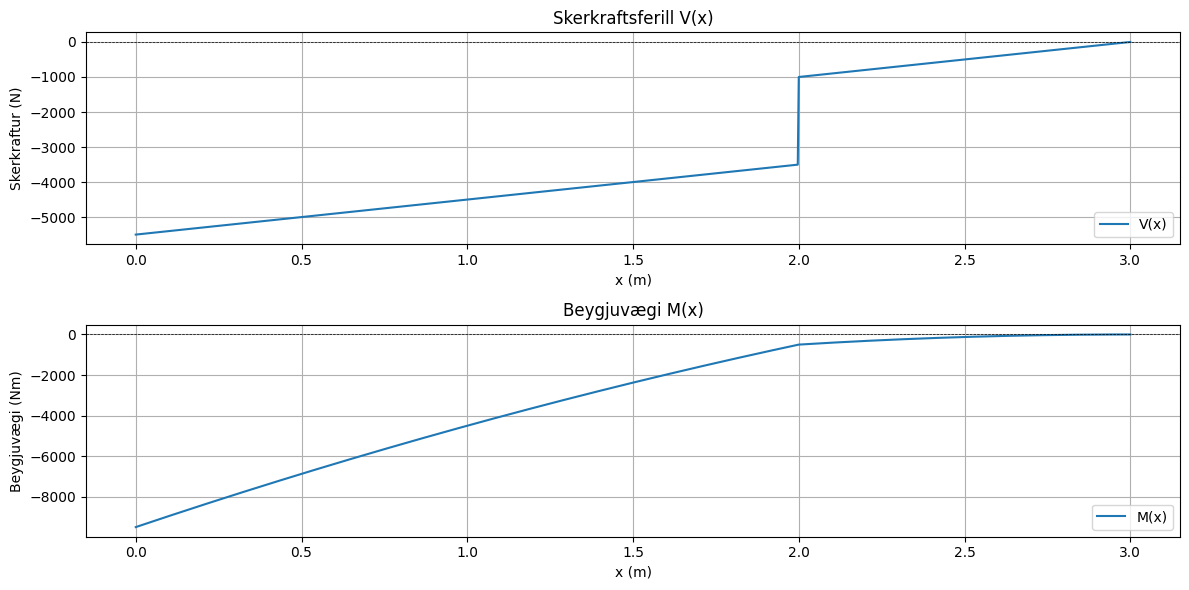

In [3]:
#| echo: true
#| output: true

# reiknum undirstöðukrafta og vægi
R_1 = P_A + w * l
M_1 = (R_1 * l - w * l**2 / 2 - P_A * (l - a))
print(f"Undirstöðukraftur í punkti A er R_1 = {R_1} N")
print(f"Undirstöðuvægi í punkti A er M_A = {M_1} Nm")

# skilgreinum macauley fallið
mac = lambda x, a, n: 0 if (n < 0) or (x < a) else (x - a) ** n

# athugum jafnvægi
def V_fun(x, R_1, M_1): 
    V = (
        - M_1 * mac(x, 0, -1)
        - R_1 * mac(x, 0, 0)
        + w * mac(x, 0, 1)
        + P_A * mac(x, a, 0)
    )
    return V

def M_fun(x, R_1, M_1):
    M = (
        - M_1 * mac(x, 0, 0)
        + R_1 * mac(x, 0, 1)
        - (w/2) * mac(x, 0, 2)
        - P_A * mac(x, a, 1)
    )
    return M

# reiknum samtölu krafta og vægis í punkti A
print(f"Samtala krafta er sum(F) = {V_fun(l, R_1, M_1)} N (á að vera 0)")
print(f"Samtala vægis um punkt A er sum(M) = {M_fun(l, R_1, M_1)} Nm (á að vera 0)")

# teiknum sker og vægisferla
x_vals = np.linspace(0, l, 1000)
V_vals = np.array([V_fun(x, R_1, M_1) for x in x_vals])
M_vals = np.array([M_fun(x, R_1, M_1) for x in x_vals])
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x_vals, V_vals, label='V(x)')
plt.title('Skerkraftsferill V(x)')
plt.xlabel('x (m)')
plt.ylabel('Skerkraftur (N)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(x_vals, M_vals, label='M(x)')
plt.title('Beygjuvægi M(x)')
plt.xlabel('x (m)')
plt.ylabel('Beygjuvægi (Nm)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Getum núna fundið færslufallið $y(x)$ með því að heilda $M(x)$ tvisvar og deila með $EI$, því
$$
    \frac{d^2 y}{dx^2}
    =
    \frac{M(x)}{EI}.
$$

Fáum þá eftir fyrstu heildun
$$
\begin{aligned}
    \frac{dy}{dx}
    =
    \frac{1}{EI}
    &\left[
        - M_1 \langle x \rangle^{1}
        + \frac{R_1}{2} \langle x \rangle^{2}
        - \frac{w}{6} \langle x \rangle^{3}
        - \frac{P_A}{2} \langle x - a \rangle^{2}
        + C_1
    \right],
\end{aligned}   
$$
og eftir seinni heildunina
$$
\begin{aligned}
    y(x)
    =
    \frac{1}{EI}
    &\left[
        - \frac{M_1}{2} \langle x \rangle^{2}
        + \frac{R_1}{6} \langle x \rangle^{3}
        - \frac{w}{24} \langle x \rangle^{4}
        - \frac{P_A}{6} \langle x - a \rangle^{3}
        + C_1 x
        + C_2
    \right].
\end{aligned}
$$

Jaðarskilyrðin eru að $y(0)=0$ (föst undirstaða) og $y'(0) = \left.dy/dx\right|_{x=0}=0$ (engin halli í undirstöðu). Sjáum þá strax að $C_2=0$ og fáum að
$$
\begin{aligned}
    \left.\frac{dy}{dx}\right|_{x=0}
    &= 0\\
    &=
    \frac{1}{EI}
    \left[
        - M_1 \langle 0 \rangle^{1}
        + \frac{R_1}{2} \langle 0 \rangle^{2}
        - \frac{w}{6} \langle 0 \rangle^{3}
        - \frac{P_A}{2} \langle 0 - a \rangle^{2}
        + C_1
    \right] \\
    &= 
    C_1,
\end{aligned}
$$
svo $C_1 = 0$. Þar með er færslufallið 
$$
\begin{aligned}
    y(x)
    =
    \frac{1}{EI}
    &\left[
        - \frac{M_1}{2} \langle x \rangle^{2}
        + \frac{R_1}{6} \langle x \rangle^{3}
        - \frac{w}{24} \langle x \rangle^{4}
        - \frac{P_A}{6} \langle x - a \rangle^{3}
    \right].
\end{aligned}
$$


Mesta færsla í punkti B er y(l) = -24.706 mm


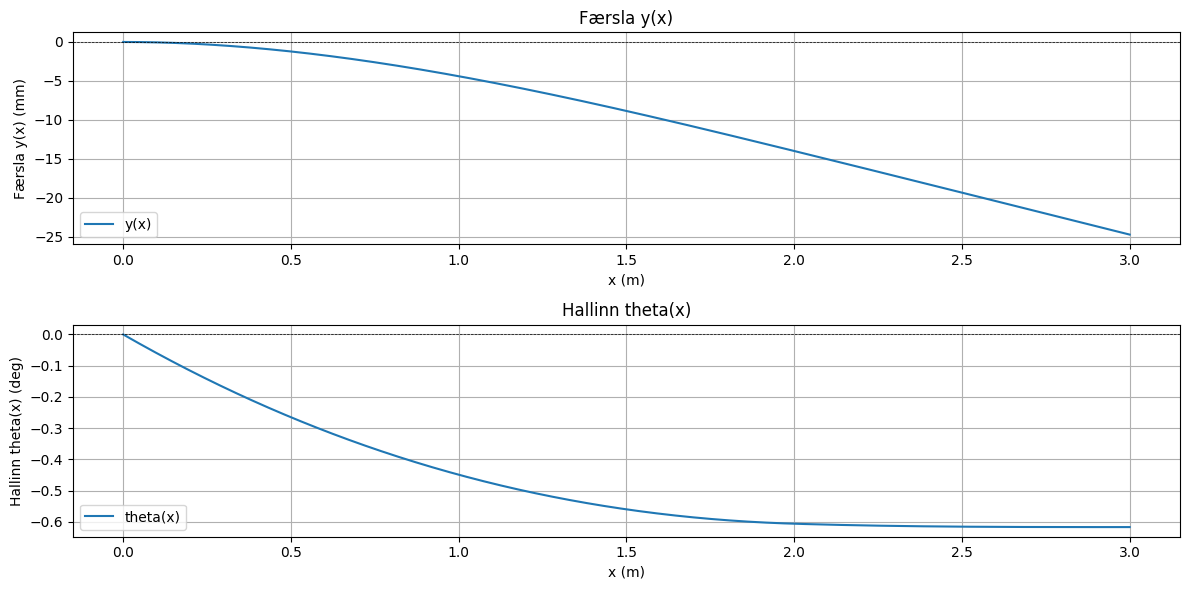

In [ ]:
#| echo: true
#| output: true

# teiknum færslufallið og hallann
def theta_fun(x, R_1, M_1):
    theta = ( 
        (
            - M_1 * mac(x, 0, 1)
            + R_1 * mac(x, 0, 2) / 2
            - w * mac(x, 0, 3) / 6
            - P_A * mac(x, a, 2) / 2
        )
        / (E * I)
    )
    return theta

def y_fun(x, R_1, M_1):
    y = (
        (
            - M_1 * mac(x, 0, 2) / 2
            + R_1 * mac(x, 0, 3) / 6
            - w * mac(x, 0, 4) / 24
            - P_A * mac(x, a, 3) / 6
        )
        / (E * I)
    )
    return y

# mesta færsla í punkti B
print(f"Mesta færsla í punkti B er y(l) = {y_fun(l, R_1, M_1)*1e3:.3f} mm")

# teiknum y(x) og theta(x) yfir allt bilið [0, l]
x_vals = np.linspace(0, l, 1000)
y_vals = np.array([y_fun(x, R_1, M_1) for x in x_vals])
theta_vals = np.array([theta_fun(x, R_1, M_1) for x in x_vals])
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x_vals, y_vals*1e3, label='y(x)')
plt.title('Færsla y(x)')
plt.xlabel('x (m)')
plt.ylabel('Færsla y(x) (mm)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(x_vals, np.degrees(theta_vals), label='theta(x)')
plt.title('Hallinn theta(x)')
plt.xlabel('x (m)')
plt.ylabel('Hallinn theta(x) (deg)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
